<a href="https://colab.research.google.com/github/vrao1/AI-ML/blob/main/Deep_Learning_Autoencoders_Model_for_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Objective **


*   To assess if a transaction is risky (in other words, fradulent) from the given credit card data
*   Learn from various features of normal transactions to distinguish fraud transactions better

**Dataset features**
Timestamp
,C1, C4, C7, C10, Class,
,C2, C5, C8, C11,
,C3, C6, C9, C12

**Deployment**
- The model will be deployed into WSGI servers based on GUnicorn which serves 1000s of requests in parallel so that business decisions can be taken in real time in assessing riskiness of a transaction








In [34]:
# importing all required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Dataset and list head of it

In [35]:
%cd /content/drive/MyDrive

df = pd.read_csv('FilesForGitHub/AutoEncoder/data/final_cred_data.csv')
df.head()

/content/drive/MyDrive


,Timestamp,Value,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,Class
0,152212.22220,1.816,13.245219,NaN,16.367516,0.029326,1.278423,2.748137,-1.331457,0.065879,-0.104518,-0.037517,-250.000000,-0.475633,0
1,159074.44440,163.568,4.401403,0.084682,-313.000000,0.001888,-0.103762,1.115678,NaN,0.062966,0.130546,-0.303582,NaN,NaN,0
2,43127.77778,24.000,-9.067399,0.762501,NaN,0.052481,-0.101681,-88.000000,0.117912,NaN,0.358812,-0.367016,NaN,361.000000,0
3,156042.22220,8.000,8.728304,-0.382673,NaN,-0.116056,-0.122346,-44.000000,-338.000000,0.042154,-0.261259,-0.103974,NaN,-1.654373,0
4,154720.00000,59.496,7.657141,0.150611,NaN,-0.034883,0.826100,0.357556,0.147640,NaN,0.080491,-0.693792,-0.308631,0.563570,0


In [36]:
df.shape

(140000, 15)

In [37]:
df['Timestamp'].describe()

count    140000.000000
mean     105334.592698
std       52763.641695
min           0.000000
25%       60107.500002
50%       94276.111110
75%      154845.833375
max      191985.555600
Name: Timestamp, dtype: float64

<Axes: ylabel='Density'>

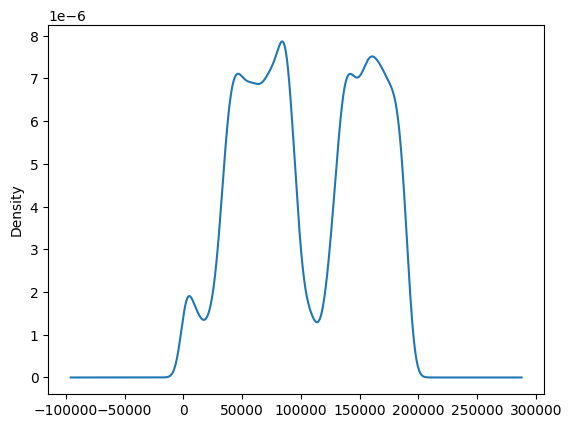

In [38]:
df['Timestamp'].plot.kde()

The feature Timestamp doesn't look much important to be considered since it is bimodal and mean of it also doesn't make any sense. Hence dropping this feature.

In [39]:
df = df.drop('Timestamp', axis=1)

In [40]:
# Getting proportion of fraud and non-fraud target classes
df['Class'].value_counts(normalize=True) * 100

Class
0    99.819286
1     0.180714
Name: proportion, dtype: float64

Density Plots for features C1 - C12

Are there any Null values in the dataset?

In [42]:
for elem in df.columns:
  print(elem, df[elem].isnull().sum())

Value 0
C1 23768
C2 10269
C3 10307
C4 0
C5 10322
C6 23471
C7 14405
C8 10355
C9 0
C10 10109
C11 14305
C12 14167
Class 0


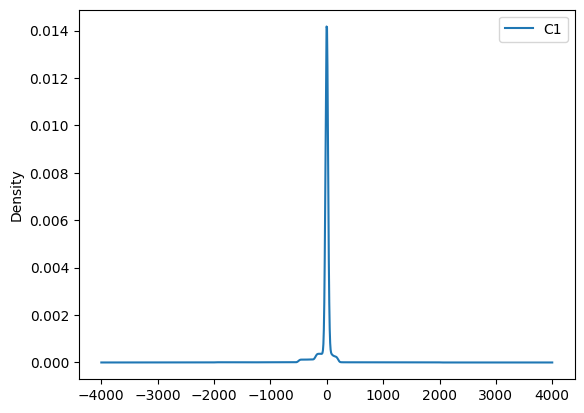

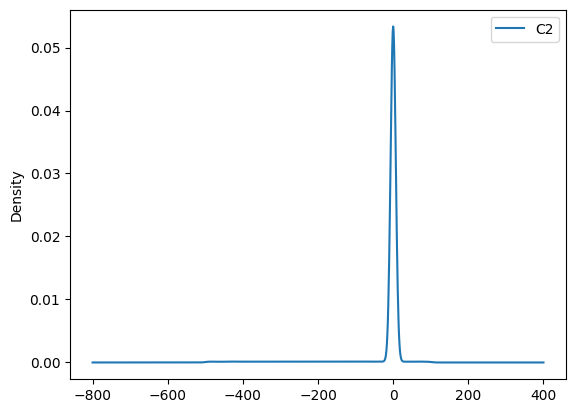

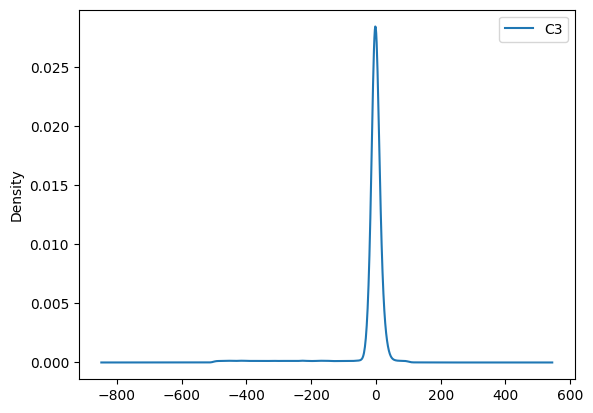

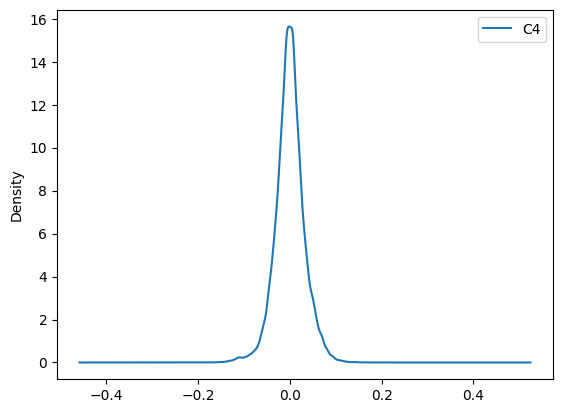

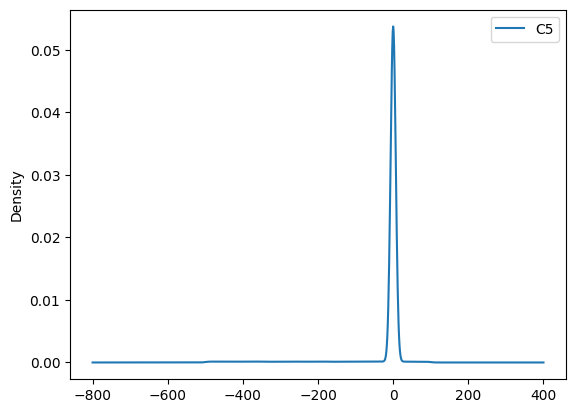

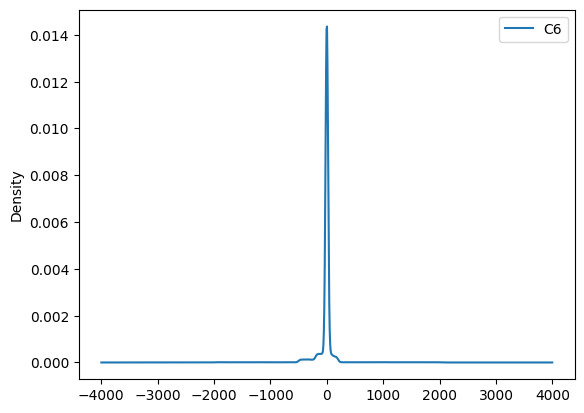

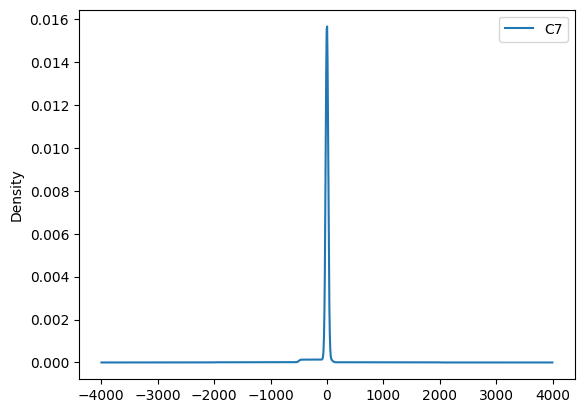

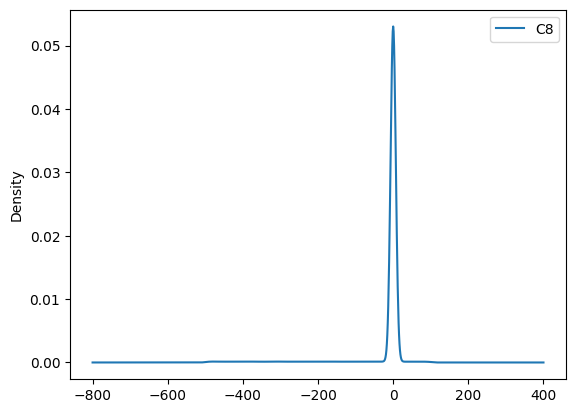

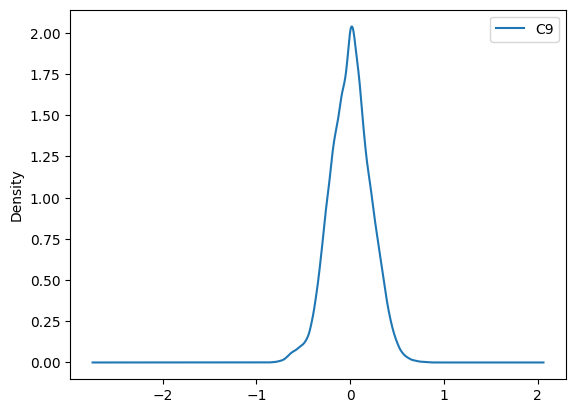

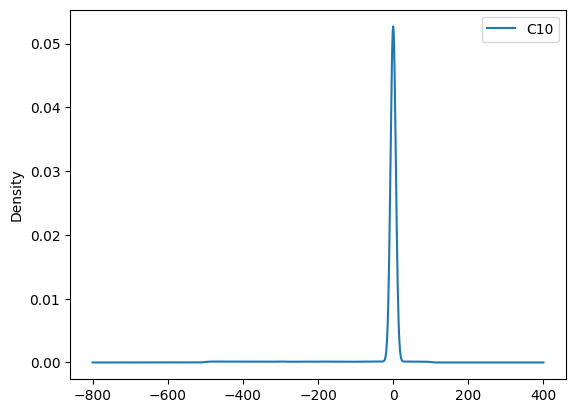

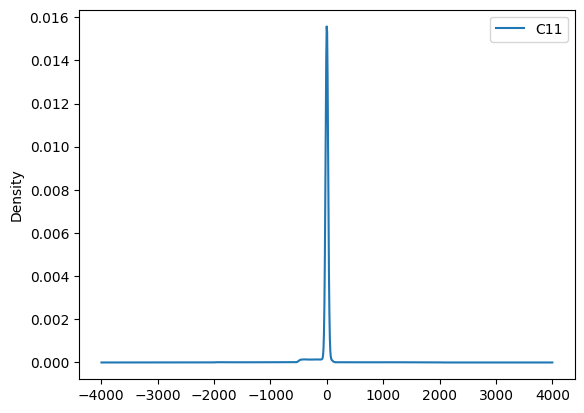

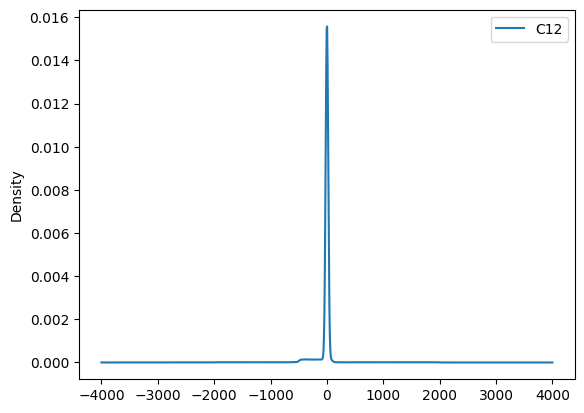

In [43]:
for elem in ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12']:
  df[[elem]].plot.kde()

Most of the kernel density estimate graphs look like normal distribution, hence the missing values cane be imputed based on parametric values or Gaussian imputation or mean values. So that the dataset could be prepared well to train the model efficiently.

In [46]:
# Here we will impute using mean value of each column from C1 to C12
df = df.fillna(df.mean())

# We have to centralize our dataset between 0 and 1 so that Autoencoder should not give distinguish importance across any of them
normalized_df = (df - df.min()) / (df.max() - df.min())

# Checking NA values
normalized_df.isna().sum()

Value    0
C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
C9       0
C10      0
C11      0
C12      0
Class    0
dtype: int64

Splitting of training set of dependendents and target label data

In [47]:
train_X = normalized_df.drop('Class', axis=1).values
train_y = normalized_df.values

train_X.shape, train_y.shape

((140000, 13), (140000, 14))

Training Phase
We will train this deep Auto Encoder machine learning model using Keras of TensorFlow library of Scikit Learn.

Input Layer ->    13 dimensional vector size as input (activation function is Relu)
Hidden Layer 1 -> 6  dimensional vector encoded size  (activation function is Relu)
Hidden Layer 2 -> 6  dimensional vector decoded size (activation function is Relu)
Output Layer ->   13 dimensional vector size as input (activation function is Linear)

In [48]:
model = keras.Sequential(
    [
        keras.Input(shape=(13,)),
        layers.Dense(13, activation="relu"),
        layers.Dense(6, activation="relu"),
        layers.Dense(6, activation="relu"),
        layers.Dense(13, activation="linear"),
    ]
)

optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss="mse", optimizer=optimizer)

In [49]:
# Keeping Batch size = 128 and epoch = 100
model.fit(train_X, train_X, batch_size=128, epochs=100)

Epoch 1/100
1094/1094 [==============================] - 3s 2ms/step - loss: 0.0420
Epoch 2/100
1094/1094 [==============================] - 3s 2ms/step - loss: 0.0056
Epoch 3/100
1094/1094 [==============================] - 4s 3ms/step - loss: 0.0054
Epoch 4/100
1094/1094 [==============================] - 3s 2ms/step - loss: 0.0053
Epoch 5/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 6/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 7/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 8/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0051
Epoch 9/100
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0048
Epoch 10/100
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0043
Epoch 11/100
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0040
Epoch 12/100
1094/1094 [==============================] - 2s 2ms/step - lo

In [50]:
# Predicting on test dataset

predictions = model.predict(train_X)
print(predictions)

4375/4375 [==============================] - 9s 2ms/step
[[0.00341567 0.49755675 0.8297153  ... 0.84312654 0.4972507  0.4987021 ]
 [0.00341851 0.4975902  0.8308687  ... 0.8370631  0.49726906 0.49868459]
 [0.00343901 0.4976277  0.8308284  ... 0.8476472  0.49726477 0.49870658]
 ...
 [0.0034318  0.49757576 0.8308184  ... 0.83810043 0.49722606 0.4986838 ]
 [0.00343571 0.4976     0.8308225  ... 0.8429134  0.49724314 0.4986952 ]
 [0.00343705 0.49760848 0.83082896 ... 0.8455523  0.49724987 0.49870154]]


In [55]:
error = np.mean(np.square(train_X - predictions))
print(error)

0.0030132453342675758


In [56]:
# Row wise error values
# Taking mean of prediction error squared
error_df = np.square(train_X - predictions).mean(axis=1)
df_error = pd.DataFrame(error_df, columns=["error"])
df_error.head()

,error
0,0.000993
1,0.014652
2,0.003171
3,0.005892
4,0.000496


In [57]:
#Experimenting with differnt Hyperparameter values
#As Output Layer consists of values between  0-1, so sigmoid also could be used instead of linear

model = keras.Sequential(
    [
        keras.Input(shape=(13,)),
        layers.Dense(13, activation="relu"),
        layers.Dense(6, activation="relu"),
        layers.Dense(6, activation="relu"),
        layers.Dense(13, activation="sigmoid"),
    ]
)

optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss="mse", optimizer=optimizer)

# Keeping Batch size = 128 and epoch = 100
model.fit(train_X, train_X, batch_size=128, epochs=100)

# Predicting on test dataset

predictions = model.predict(train_X)
print(predictions)

error = np.mean(np.square(train_X - predictions))
print(error)

# Row wise error values
# Taking mean of prediction error squared
error_df = np.square(train_X - predictions).mean(axis=1)
df_error = pd.DataFrame(error_df, columns=["error"])
df_error.head()

Epoch 1/100
1094/1094 [==============================] - 3s 2ms/step - loss: 0.0137
Epoch 2/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 3/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 4/100
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0061
Epoch 5/100
1094/1094 [==============================] - 4s 3ms/step - loss: 0.0061
Epoch 6/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0061
Epoch 7/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0060
Epoch 8/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0060
Epoch 9/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.0060
Epoch 10/100
1094/1094 [==============================] - 3s 3ms/step - loss: 0.0059
Epoch 11/100
1094/1094 [==============================] - 4s 3ms/step - loss: 0.0058
Epoch 12/100
1094/1094 [==============================] - 2s 2ms/step - lo

,error
0,0.000807
1,0.014428
2,0.003431
3,0.005584
4,0.000618


In [58]:
#Experimenting with differnt Hyperparameter values
#As Output Layer consists of values between  0-1, so RELU also could be used instead of linear

model = keras.Sequential(
    [
        keras.Input(shape=(13,)),
        layers.Dense(13, activation="relu"),
        layers.Dense(6, activation="relu"),
        layers.Dense(6, activation="relu"),
        layers.Dense(13, activation="relu"),
    ]
)

optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss="mse", optimizer=optimizer)

# Keeping Batch size = 128 and epoch = 100
model.fit(train_X, train_X, batch_size=128, epochs=100)

# Predicting on test dataset

predictions = model.predict(train_X)
print(predictions)

error = np.mean(np.square(train_X - predictions))
print(error)

# Row wise error values
# Taking mean of prediction error squared
error_df = np.square(train_X - predictions).mean(axis=1)
df_error = pd.DataFrame(error_df, columns=["error"])
df_error.head()

Epoch 1/100
1094/1094 [==============================] - 3s 2ms/step - loss: 0.1589
Epoch 2/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.1502
Epoch 3/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.1501
Epoch 4/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.1501
Epoch 5/100
1094/1094 [==============================] - 3s 3ms/step - loss: 0.1501
Epoch 6/100
1094/1094 [==============================] - 4s 3ms/step - loss: 0.1501
Epoch 7/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.1501
Epoch 8/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.1501
Epoch 9/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.1501
Epoch 10/100
1094/1094 [==============================] - 2s 2ms/step - loss: 0.1501
Epoch 11/100
1094/1094 [==============================] - 3s 3ms/step - loss: 0.1501
Epoch 12/100
1094/1094 [==============================] - 3s 3ms/step - lo

,error
0,0.149431
1,0.116260
2,0.156372
3,0.152777
4,0.148602
